In [ ]:
### Observations
# The skew in the number of cities at higher positive latitudes is indicative of more land mass in northern hemisphere
# A correlation between humidity and distance from equator does exist but is not as strong as one would think
# There seems to be a wider range of temperature values near the 60th parallel north (Alaska, Canada, Scandanavia)

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# Use smaller set for debugging purposes
#lats = np.random.uniform(low=-90.000, high=90.000, size=50)
#lngs = np.random.uniform(low=-180.000, high=180.000, size=50)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
city_list = []
for city in cities:
        query_url = "http://api.openweathermap.org/data/2.5/weather?appid=" + api_key + "&q=" + city
        data = requests.get(query_url).json()
        if data['cod']=='404':
            print(f"{city} not found")
            continue
        else:
            print(f"{city} found and processed")
        cdict = {}
        cdict.update({'City':data['name']})
        cdict.update({'Cloudiness':data['clouds']['all']})
        cdict.update({'Country':data['sys']['country']})
        cdict.update({'Date':data['dt']})
        cdict.update({'Humidity':data['main']['humidity']})
        cdict.update({'Lat':data['coord']['lat']})
        cdict.update({'Lon':data['coord']['lon']})
        cdict.update({'Max Temp':32+1.8*(data['main']['temp_max']-273.15)})
        cdict.update({'Wind Speed':data['wind']['speed']})
        city_list.append(cdict)
print(f"Finished")

mataura found and processed
slave lake found and processed
albany found and processed
rikitea found and processed
chuy found and processed
new norfolk found and processed
kapaa found and processed
qaanaaq found and processed
bonthe found and processed
nizhneyansk not found
bengkulu not found
nanakuli found and processed
fomboni found and processed
longyearbyen found and processed
grindavik found and processed
ushuaia found and processed
hami found and processed
resistencia found and processed
hobart found and processed
nogliki found and processed
atuona found and processed
kamenskoye not found
tessalit found and processed
provideniya found and processed
saleaula not found
pevek found and processed
ahipara found and processed
khandyga found and processed
nikolskoye found and processed
mar del plata found and processed
saskylakh found and processed
shilovo found and processed
viedma found and processed
port blair found and processed
bondoukou found and processed
santa cruz found and proc

guerrero negro found and processed
ilulissat found and processed
atasu found and processed
baramati found and processed
grand gaube found and processed
yulara found and processed
umzimvubu not found
beloha found and processed
dickinson found and processed
lensk found and processed
labuhan found and processed
castro found and processed
aqtobe found and processed
hay river found and processed
nishihara found and processed
lorengau found and processed
zanjan found and processed
tezu found and processed
longford found and processed
dunedin found and processed
ostrovnoy found and processed
worland found and processed
intipuca found and processed
beitbridge found and processed
avera found and processed
le port found and processed
louisbourg not found
hastings found and processed
tjaereborg found and processed
belaya gora found and processed
ingham found and processed
oktyabrskoye found and processed
shieli found and processed
najran found and processed
tautira found and processed
kerteh not 

barabai found and processed
nizhneangarsk found and processed
turek found and processed
puerto madero found and processed
karimpur found and processed
henderson found and processed
dolbeau not found
magistralnyy found and processed
visby found and processed
nevsehir found and processed
alice springs found and processed
mariestad found and processed
thongwa found and processed
colac found and processed
nguiu not found
cockburn harbour not found
bolungarvik not found
mizan teferi found and processed
williams lake found and processed
antalaha found and processed
naftah not found
great falls found and processed
mao found and processed
buritizeiro found and processed
mehriz found and processed
jiangyou found and processed
peniche found and processed
zaozhuang found and processed
luba found and processed
vaitape found and processed
ipua found and processed
bercel found and processed
Finished


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# export to csv
df = pd.DataFrame(city_list)
df.to_csv("city_data.csv")
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Mataura,0,NZ,1554577668,73,-46.19,168.86,24.1664,1.31
1,Slave Lake,90,CA,1554577080,100,55.28,-114.77,33.8000,1.00
2,Albany,40,US,1554577564,50,42.65,-73.75,57.9920,4.60
3,Rikitea,76,PF,1554577436,100,-23.12,-134.97,77.2664,6.56
4,Chuy,80,UY,1554577550,82,-33.69,-53.46,70.6964,4.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

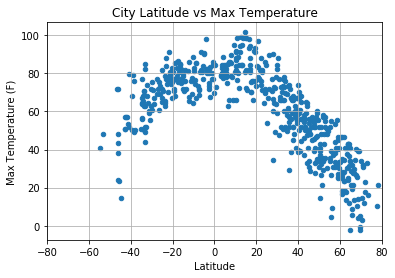

In [21]:
ax1 = df.plot.scatter(x='Lat', y='Max Temp', title='City Latitude vs Max Temperature', grid=True)
ax1.set_xlim([-80, 80])
ax1.set_xlabel("Latitude")
ax1.set_ylabel("Max Temperature (F)")
plt.savefig('temperature.png')

#### Latitude vs. Humidity Plot

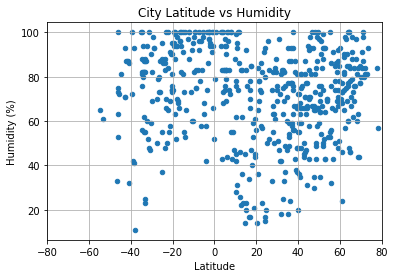

In [23]:
ax2 = df.plot.scatter(x='Lat', y='Humidity', title='City Latitude vs Humidity', grid=True)
ax2.set_xlim([-80, 80])
ax2.set_xlabel("Latitude")
ax2.set_ylabel("Humidity (%)")
plt.savefig('humidity.png')

#### Latitude vs. Cloudiness Plot

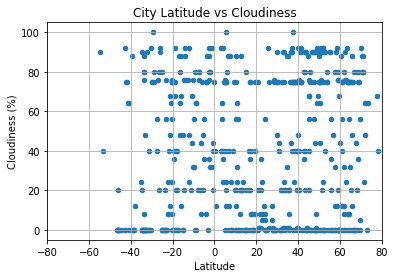

In [24]:
ax3 = df.plot.scatter(x='Lat', y='Cloudiness', title='City Latitude vs Cloudiness', grid=True)
ax3.set_xlim([-80, 80])
ax3.set_xlabel("Latitude")
ax3.set_ylabel("Cloudiness (%)")
plt.savefig('cloudiness.png')

#### Latitude vs. Wind Speed Plot

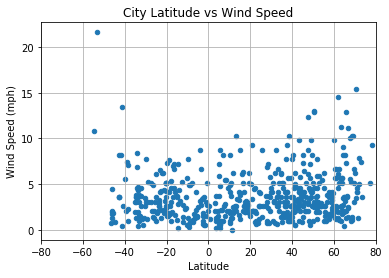

In [25]:
ax4 = df.plot.scatter(x='Lat', y='Wind Speed', title='City Latitude vs Wind Speed', grid=True)
ax4.set_xlim([-80, 80])
ax4.set_xlabel("Latitude")
ax4.set_ylabel("Wind Speed (mph)")
plt.savefig('windspeed.png')